# Handling Imbalance Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt=pd.read_csv('cancer_dataset.csv')
dt

Age                                              Race   \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0     Married (including common law)         NaN       T2      N3      IIIC   
1     Married (including common law)         NaN       T2      N2      IIIA   
2     Married (including common law)         NaN       T2      N1       IIB   
3                           Divorced         NaN       T1      N1       IIA   
4     Married (including common law)         NaN       T2      N2      IIIA   
...                              ...         ...      ...     ...       ...   
4019  Married (including common law)         NaN       T1      N1       IIA   
4020  Married (including common law)         NaN       T1      N2      IIIA   
4021                        Divorced         NaN       T1      N1       IIA   
4022  Married (including common law)         NaN       T1      N1       IIA   
4023                        Divorced         NaN       T1      N1       IIA   

                                    Grade   A Stage  Tumor Size  \
0     Moderately differentiated; Grade II  Regional          40   
1     Moderately differentiated; Grade II  Regional          45   
2        Poorly differentiated; Grade III  Regional          25   
3     Moderately differentiated; Grade II  Regional          19   
4     Moderately differentiated; Grade II  Regional          35   
...                                   ...       ...         ...   
4019         Well differentiated; Grade I  Regional          10   
4020     Poorly differentiated; Grade III  Regional           9   
4021  Moderately differentiated; Grade II  Regional           9   
4022  Moderately differentiated; Grade II  Regional           9   
4023  Moderately differentiated; Grade II  Regional           8   

     Estrogen Status Progesterone Status  Regional Node Examined  \
0           Positive            Positive                      19   
1           Positive            Positive                      25   
2           Positive            Positive                       4   
3           Positive            Positive                      26   
4           Positive            Positive                      21   
...              ...                 ...                     ...   
4019        Positive            Positive                      19   
4020        Negative            Negative                      13   
4021        Negative            Negative                       4   
4022        Positive            Positive                      14   
4023        Positive            Positive                       1   

      Reginol Node Positive  Survival Months Status  
0                        11                1  Alive  
1                         9                2  Alive  
2                         1                2   Dead  
3                         1                2   Dead  
4                         5                3   Dead  
...                     ...              ...    ...  
4019                      1              107  Alive  
4020                      5              107  Alive  
4021                      2              107  Alive  
4022                      2              107  Alive  
4023                      1              107  Alive  

[4024 rows x 16 c

## Preprocessing values from categorical to numerical

In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in dt.columns:
    if col=='Age':
        continue
    dt[col]=lb.fit_transform(dt[col])
dt

Age  Race   Marital Status  Unnamed: 3  T Stage   N Stage  6th Stage  \
0      43      1               1           0         1        2          4   
1      47      1               1           0         1        1          2   
2      67      2               1           0         1        0          1   
3      46      2               0           0         0        0          0   
4      63      2               1           0         1        1          2   
...   ...    ...             ...         ...       ...      ...        ...   
4019   52      2               1           0         0        0          0   
4020   53      2               1           0         0        1          2   
4021   53      2               0           0         0        0          0   
4022   60      1               1           0         0        0          0   
4023   62      2               0           0         0        0          0   

      Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0         0        1          39                1                    1   
1         0        1          44                1                    1   
2         1        1          24                1                    1   
3         0        1          18                1                    1   
4         0        1          34                1                    1   
...     ...      ...         ...              ...                  ...   
4019      3        1           9                1                    1   
4020      1        1           8                0                    0   
4021      0        1           8                0                    0   
4022      0        1           8                1                    1   
4023      0        1           7                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                         18                     10                0       0  
1                         24                      8                1       0  
2                          3                      0                1       1  
3                         25                      0                1       1  
4                         20                      4                2       1  
...                      ...                    ...              ...     ...  
4019                      18                      0              106       0  
4020                      12                      4              106       0  
4021                       3                      1              106       0  
4022                      13                      1              106       0  
4023                       0                      0              106       0  

[4024 rows x 16 columns]

In [5]:
for i in range(0,len(dt)):
    if(dt.iloc[i,0]<=50):
        dt.iloc[i,0]=0
    elif dt.iloc[i,0]<=60:
        dt.iloc[i,0]=1
    else:
        dt.iloc[i,0]=2

In [6]:
dt

Age  Race   Marital Status  Unnamed: 3  T Stage   N Stage  6th Stage  \
0       0      1               1           0         1        2          4   
1       0      1               1           0         1        1          2   
2       2      2               1           0         1        0          1   
3       0      2               0           0         0        0          0   
4       2      2               1           0         1        1          2   
...   ...    ...             ...         ...       ...      ...        ...   
4019    1      2               1           0         0        0          0   
4020    1      2               1           0         0        1          2   
4021    1      2               0           0         0        0          0   
4022    1      1               1           0         0        0          0   
4023    2      2               0           0         0        0          0   

      Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0         0        1          39                1                    1   
1         0        1          44                1                    1   
2         1        1          24                1                    1   
3         0        1          18                1                    1   
4         0        1          34                1                    1   
...     ...      ...         ...              ...                  ...   
4019      3        1           9                1                    1   
4020      1        1           8                0                    0   
4021      0        1           8                0                    0   
4022      0        1           8                1                    1   
4023      0        1           7                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                         18                     10                0       0  
1                         24                      8                1       0  
2                          3                      0                1       1  
3                         25                      0                1       1  
4                         20                      4                2       1  
...                      ...                    ...              ...     ...  
4019                      18                      0              106       0  
4020                      12                      4              106       0  
4021                       3                      1              106       0  
4022                      13                      1              106       0  
4023                       0                      0              106       0  

[4024 rows x 16 columns]

Why Class Imbalance Problem is with dataset

In [7]:
dt['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

Here we can clearly see that class 0 dominates in the dataset so surely the problem exist.

In [8]:
X=dt.drop(columns=['Status'])
y=pd.DataFrame(dt['Status'])
X,y

(      Age  Race   Marital Status  Unnamed: 3  T Stage   N Stage  6th Stage  \
 0       0      1               1           0         1        2          4   
 1       0      1               1           0         1        1          2   
 2       2      2               1           0         1        0          1   
 3       0      2               0           0         0        0          0   
 4       2      2               1           0         1        1          2   
 ...   ...    ...             ...         ...       ...      ...        ...   
 4019    1      2               1           0         0        0          0   
 4020    1      2               1           0         0        1          2   
 4021    1      2               0           0         0        0          0   
 4022    1      1               1           0         0        0          0   
 4023    2      2               0           0         0        0          0   
 
       Grade  A Stage  Tumor Size  Estrogen Status

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Applying Different Classifier with and without preprocessing and analyzing the accuracy

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
def model_train(model,X_train,y_train):
    model.fit(X_train,y_train)
    return model

In [12]:
def model_predict(model,X_test,y_test):
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    return acc,cm

# Without any Class Balancing

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [14]:
def init():
    lr=LogisticRegression()
    knn=KNeighborsClassifier()
    svc=SVC()
    dtc=DecisionTreeClassifier()
    models={
    'LogisticRegression':lr,
    'KNN':knn,
    'SVC':svc,
    'DecisionTree':dtc
    }
    return models

In [15]:
models=init()

LogisticRegression
0.8993788819875776
KNN
0.8968944099378882
SVC
0.8894409937888199
DecisionTree
0.8335403726708075


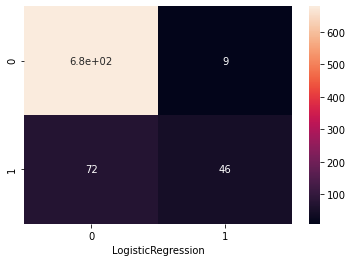

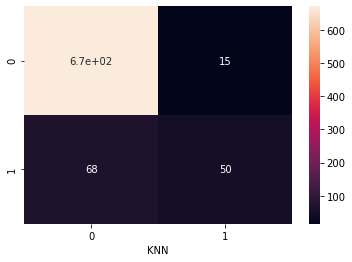

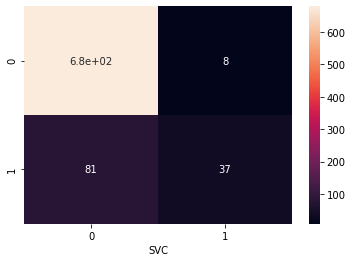

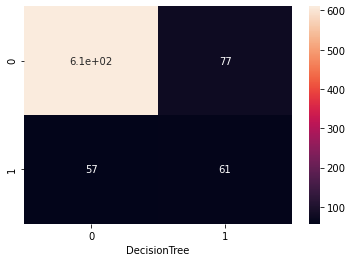

In [16]:
for name,model in models.items():
    print(name)
    model=model_train(model,X_train,y_train)
    acc,cm=model_predict(model,X_test,y_test)
    print(acc)
    plt.figure()
    sns.heatmap(cm,annot=True,xticklabels=True)
    plt.xlabel(name)

## Applying Different Techniques for Handling Imbalance Dataset

1.BorderLine SMOTE

In [17]:
from imblearn.over_sampling import BorderlineSMOTE
bl=BorderlineSMOTE()
X_border,y_border=bl.fit_resample(X,y)
X_border,y_border

(      Age  Race   Marital Status  Unnamed: 3  T Stage   N Stage  6th Stage  \
 0       0      1               1           0         1        2          4   
 1       0      1               1           0         1        1          2   
 2       2      2               1           0         1        0          1   
 3       0      2               0           0         0        0          0   
 4       2      2               1           0         1        1          2   
 ...   ...    ...             ...         ...       ...      ...        ...   
 6811    1      2               0           0         1        0          1   
 6812    0      2               0           0         0        0          0   
 6813    1      1               1           0         0        1          2   
 6814    1      2               0           0         1        0          1   
 6815    2      2               0           0         1        2          4   
 
       Grade  A Stage  Tumor Size  Estrogen Status

In [18]:
y_border.value_counts()

Status
0         3408
1         3408
dtype: int64

In [19]:
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_border,y_border,test_size=0.2)

LogisticRegression
0.7705278592375366
KNN
0.8724340175953079
SVC
0.7631964809384164
DecisionTree
0.8702346041055719


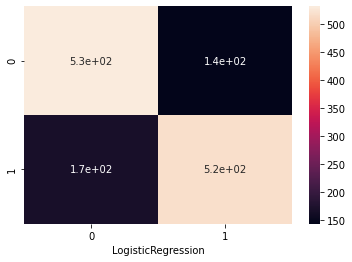

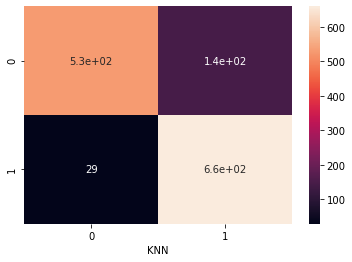

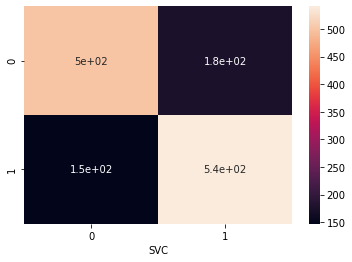

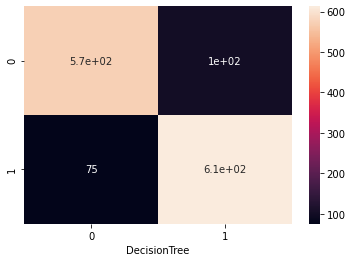

In [20]:
models=init()
for name,model in models.items():
    print(name)
    model=model_train(model,X_train_b,y_train_b)
    acc,cm=model_predict(model,X_test_b,y_test_b)
    print(acc)
    plt.figure()
    sns.heatmap(cm,annot=True,xticklabels=True)
    plt.xlabel(name)

2.SVMSmote

In [21]:
from imblearn.over_sampling import SVMSMOTE
svmsm=SVMSMOTE()
X_svm,y_svm=bl.fit_resample(X,y)
X_svm,y_svm

(      Age  Race   Marital Status  Unnamed: 3  T Stage   N Stage  6th Stage  \
 0       0      1               1           0         1        2          4   
 1       0      1               1           0         1        1          2   
 2       2      2               1           0         1        0          1   
 3       0      2               0           0         0        0          0   
 4       2      2               1           0         1        1          2   
 ...   ...    ...             ...         ...       ...      ...        ...   
 6811    0      2               2           0         1        0          1   
 6812    1      2               1           0         2        1          2   
 6813    0      1               0           0         0        0          0   
 6814    1      2               0           0         1        2          4   
 6815    0      2               1           0         1        0          1   
 
       Grade  A Stage  Tumor Size  Estrogen Status

LogisticRegression
0.7690615835777126
KNN
0.8629032258064516
SVC
0.7741935483870968
DecisionTree
0.8533724340175953


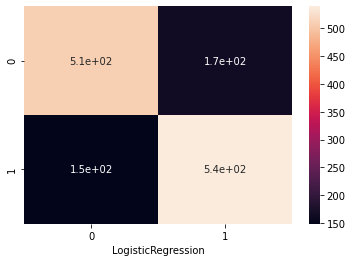

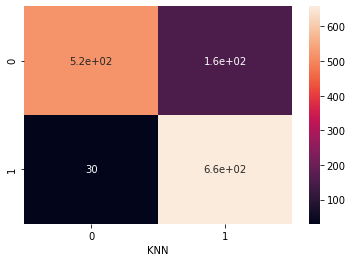

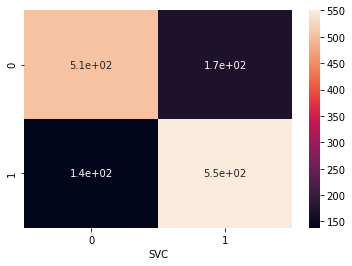

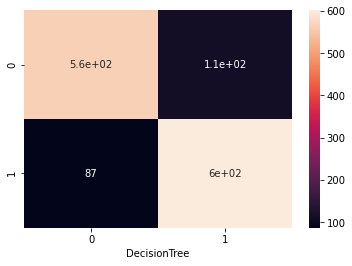

In [22]:
X_train_svm,X_test_svm,y_train_svm,y_test_svm=train_test_split(X_svm,y_svm,test_size=0.2)
models=init()
for name,model in models.items():
    print(name)
    model=model_train(model,X_train_svm,y_train_svm)
    acc,cm=model_predict(model,X_test_svm,y_test_svm)
    print(acc)
    plt.figure()
    sns.heatmap(cm,annot=True,xticklabels=True)
    plt.xlabel(name)

3.KMeans SMOTE

LogisticRegression
0.7712609970674487
KNN
0.8878299120234604
SVC
0.7690615835777126
DecisionTree
0.8687683284457478


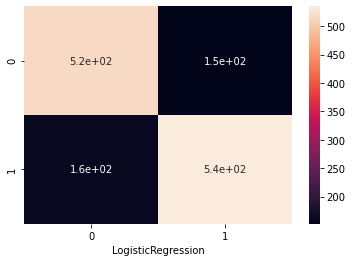

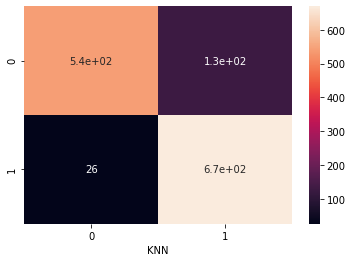

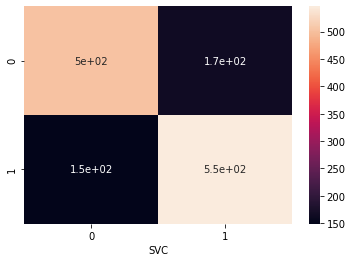

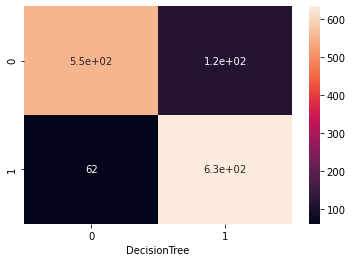

In [23]:
from imblearn.over_sampling import KMeansSMOTE
km=KMeansSMOTE()
X_km,y_km=bl.fit_resample(X,y)
X_km,y_km
X_train_km,X_test_km,y_train_km,y_test_km=train_test_split(X_km,y_km,test_size=0.2)
models=init()
for name,model in models.items():
    print(name)
    model=model_train(model,X_train_km,y_train_km)
    acc,cm=model_predict(model,X_test_km,y_test_km)
    print(acc)
    plt.figure()
    sns.heatmap(cm,annot=True,xticklabels=True)
    plt.xlabel(name)

4.Simple Smote Technique

LogisticRegression
0.7983870967741935
KNN
0.8797653958944281
SVC
0.782991202346041
DecisionTree
0.8717008797653959


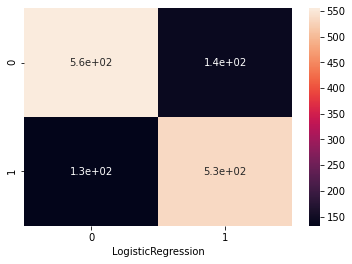

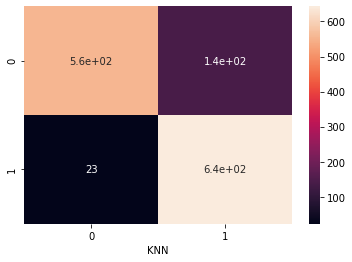

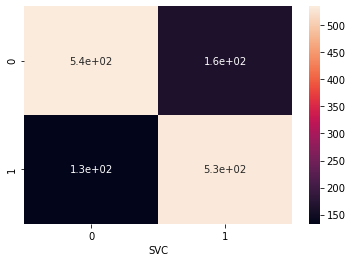

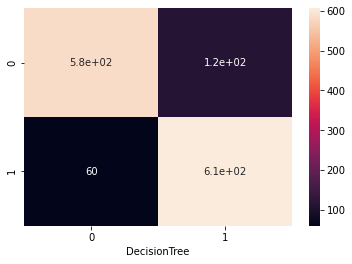

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm,y_sm=bl.fit_resample(X,y)
X_sm,y_sm
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2)
models=init()
for name,model in models.items():
    print(name)
    model=model_train(model,X_train_sm,y_train_sm)
    acc,cm=model_predict(model,X_test_sm,y_test_sm)
    print(acc)
    plt.figure()
    sns.heatmap(cm,annot=True,xticklabels=True)
    plt.xlabel(name)

From the above methodology we can see that the accuracy has been decreased in oversampling methods but we have overcome overfitting of model as well as biased data.